In [13]:
import scipy.io as scio
import h5py
import numpy as np
import os
import matplotlib.pyplot as plt
img_path_data = 'F:/IDM download'
#print(os.listdir(img_path_data))
mat_file_list = []
error_list = []
for file in os.listdir(img_path_data):
    if file[-3:] =='mat' and file[:4]!='Cave':
        try:
            origin_img = h5py.File(img_path_data+'/'+file,'r')
        except (OSError):
            print(file+':OSError: Unable to open file (file signature not found)')
            error_list.append(file)
            continue
        mat_file_list.append(file)
num_mat = len(mat_file_list)
print(num_mat)
print(mat_file_list)

bguCAMP_0514-1712_31c.mat:OSError: Unable to open file (file signature not found)
bgu_0403-1511_31c.mat:OSError: Unable to open file (file signature not found)
eve_0331-1606_31c.mat:OSError: Unable to open file (file signature not found)
Flower_0325-1336_31c.mat:OSError: Unable to open file (file signature not found)
omer_0331-1102_31c.mat:OSError: Unable to open file (file signature not found)
omer_0331-1150_31c.mat:OSError: Unable to open file (file signature not found)
prk_0328-1034_31c.mat:OSError: Unable to open file (file signature not found)
Ramot0325-1364_31c.mat:OSError: Unable to open file (file signature not found)
rsh_0406-1413_31c.mat:OSError: Unable to open file (file signature not found)
sat_0406-1130_31c.mat:OSError: Unable to open file (file signature not found)
203
['4cam_0411-1640-1.mat', '4cam_0411-1648.mat', 'bguCAMP_0514-1659.mat', 'bguCAMP_0514-1711.mat', 'bguCAMP_0514-1712.mat', 'bguCAMP_0514-1718.mat', 'bguCAMP_0514-1723.mat', 'bguCAMP_0514-1724.mat', 'BGU_0403

In [14]:
#for mat in mat_file_list:
mat = mat_file_list[50]
#mat= 'omer_0331-1102_31c.mat'
print(mat)
path = img_path_data+'/'+mat
#print(scio.loadmat(path).keys()) # dict_keys(['__header__', '__version__', '__globals__', 'data'])
origin_img = h5py.File(path,'r')
print(origin_img.keys())

bands = origin_img['bands'][:].T
rad = origin_img['rad'][:].transpose(1,2,0)
rgb = origin_img['rgb'][:].transpose(2,1,0)


hill_0325-1242.mat
<KeysViewHDF5 ['bands', 'rad', 'rgb']>


(1392, 1191, 31) 3810.75 185.75
[[400. 410. 420. 430. 440. 450. 460. 470. 480. 490. 500. 510. 520. 530.
  540. 550. 560. 570. 580. 590. 600. 610. 620. 630. 640. 650. 660. 670.
  680. 690. 700.]]
(1392, 1191, 3) 1.0 0.0


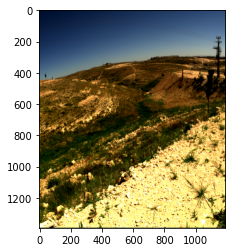

In [15]:
print(rad.shape,rad.max(),rad.min())
print(bands)
print(rgb.shape,rgb.max(),rgb.min())
plt.imshow(rgb)

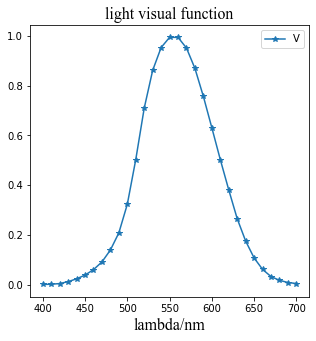

'\nvisual_wl = np.arange(380,781,5) # 明视觉函数\nlight_visual_F = np.zeros([visual_wl.shape[0],2])\nlight_visual_F[:,0]=visual_wl\nprint(visual_wl.shape,light_visual_F.shape)\nwith  open("data/Camera spectral response function/light visual function.txt","r") as f:\n    i=0\n    for line in f.readlines():\n        light_visual_F[i,1]=int(line)/10**5\n        i=i+1\nsavemat(\'data/Camera spectral response function/light visual function.mat\', {\'data\': light_visual_F })\nprint(light_visual_F)\n'

In [16]:
from scipy.io import loadmat,savemat
K=200 # e-/DN
tc=10**-3 # s 1ms
h_p=6.62607015*10**-17 # *10**-17J/s
c_light = 3 # 10**8m/s
wavelength_m = np.arange(400,710,10) # 10**-9m
light_visual_F = np.zeros([wavelength_m.shape[0],2])
light_visual_F[:,0]=wavelength_m

temp = loadmat('data/Camera spectral response function/light visual function.mat')['data'][:,1]

light_visual_F[:,1]=temp[4:65:2]
font1 = {'family' : 'Times New Roman',
'weight' : 'normal',
'size'   : 16,
}
plt.figure(figsize=(5,5))
plt.title('light visual function',font1)
plt.xlabel('lambda/nm',font1)
plt.plot(light_visual_F[:,0],light_visual_F[:,1],'-*')
plt.legend(['V'])
#plt.savefig('data/Camera spectral response function/' + 'light visual function.png')
plt.show()
Kmax= 683 #lm/W
#第一种方法
'''
visual_wl = np.arange(380,781,5) # 明视觉函数
light_visual_F = np.zeros([visual_wl.shape[0],2])
light_visual_F[:,0]=visual_wl
print(visual_wl.shape,light_visual_F.shape)
with  open("data/Camera spectral response function/light visual function.txt","r") as f:
    i=0
    for line in f.readlines():
        light_visual_F[i,1]=int(line)/10**5
        i=i+1
savemat('data/Camera spectral response function/light visual function.mat', {'data': light_visual_F })
print(light_visual_F)
'''

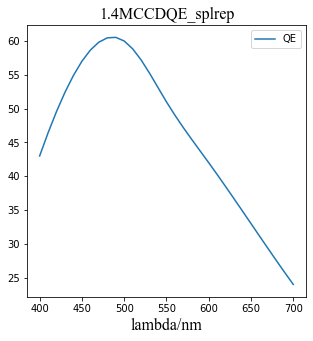

In [17]:
# 1.4MCCD量子效率三次样条插值
QE_data = scio.loadmat('data/Camera spectral response function/1.4MCCDQE_splrep.mat')['filters']

font1 = {'family' : 'Times New Roman',
'weight' : 'normal',
'size'   : 16,
}
plt.figure(figsize=(5,5))
plt.title('1.4MCCDQE_splrep',font1)
plt.xlabel('lambda/nm',font1)
plt.plot(np.arange(400,710,10),QE_data)
plt.legend(['QE'])
#plt.savefig(img_path_data + '1.4MCCDQE_splrep.png')
plt.show()


#path='C:/data.mat'                    #需要读取的mat文件路径
#feature=h5py.File(path)               #读取mat文件
#data = feature['feature_data'][:]     #读取mat文件中所有数据存储到array中

icvlh5py = h5py.File('ICVL-mat数据/BGU_0403-1419-1.mat','r')
origin_img_icvl = icvlh5py['rad'][:]
origin_img_icvl= origin_img_icvl.transpose(1,2,0) # 转换索引
origin_img_icvl =np.flip(origin_img_icvl,0) # 上下翻转矩阵
#print(origin_img_icvl.keys())<KeysViewHDF5 ['bands', 'rad', 'rgb']>
#
plt.imshow(origin_img_icvl[:,:,0],cmap='gray')
print(origin_img_icvl[:,:,0].shape) # 提取索引位置图层
print(origin_img_icvl[:,:,0].max(),origin_img_icvl[:,:,0].min())

In [18]:
#print(K*2**12/0.6*h_p*c_light/500/tc*Kmax*0.323/36/10**-12) # lm/平方米  lux（某波长)

spectum = np.ones([1,31])*2**12*K*h_p*c_light/tc*Kmax/36/10**-12/QE_data.reshape(-1)/0.01/wavelength_m*light_visual_F[:,1] # 太阳有10wlux
print(spectum)#
print(sum(sum(spectum)))


[[7.18483791e+00 1.96402582e+01 5.93477831e+01 1.58989946e+02
  2.94114384e+02 4.57700786e+02 6.87075035e+02 9.99756777e+02
  1.47992983e+03 2.16659916e+03 3.32634046e+03 5.17814742e+03
  7.37448166e+03 9.09690836e+03 1.02762223e+04 1.09585684e+04
  1.11968712e+04 1.09362960e+04 1.02017590e+04 9.06817054e+03
  7.73596060e+03 6.32896771e+03 4.93514500e+03 3.54475683e+03
  2.42509601e+03 1.54113936e+03 9.16226409e+02 5.02938983e+02
  2.80552728e+02 1.42771347e+02 7.53980312e+01]]
122373.0570902289


In [19]:
# 不筛选像素，直接存
from scipy.io import loadmat,savemat
import random
pixel_savepath = 'ICVL-pixel数据/'

random.seed(5) # 打乱图像
random.shuffle(mat_file_list)

train_num = int(num_mat*0.8) # 取80%为训练集
train_list = mat_file_list[:train_num]
test_num = num_mat-train_num
test_list = mat_file_list[train_num:]

traincut_num = train_num//9 # 九张一幅图
trainleave_num = train_num-traincut_num*9
testcut_num = test_num//9 # 九张一幅图
testleave_num = test_num-testcut_num*9

print('共%d张图,%d张训练,%d张测试'%(num_mat,train_num,test_num))
print('共%d张图,%d张训练,%d张测试'%(num_mat,len(train_list),len(test_list)))

共203张图,162张训练,41张测试
共203张图,162张训练,41张测试


In [20]:
print(test_list)

['prk_0328-1025.mat', 'Labtest_0910-1502.mat', '4cam_0411-1648.mat', '4cam_0411-1640-1.mat', 'eve_0331-1633.mat', 'eve_0331-1632.mat', 'objects_0924-1550.mat', 'plt_0411-1116.mat', 'omer_0331-1150.mat', 'eve_0331-1647.mat', 'BGU_0522-1201.mat', 'sat_0406-1130.mat', 'nachal_0823-1144.mat', 'grf_0328-0949.mat', 'Lehavim_0910-1635.mat', 'nachal_0823-1210-4.mat', 'Labtest_0910-1506.mat', 'bguCAMP_0514-1711.mat', 'rmt_0328-1241-1.mat', 'objects_0924-1645.mat', 'eve_0331-1549.mat', 'objects_0924-1633.mat', 'nachal_0823-1127.mat', 'rsh_0406-1441-1.mat', 'objects_0924-1605.mat', 'nachal_0823-1118.mat', 'eve_0331-1601.mat', 'Flower_0325-1336.mat', 'bgu_0403-1523.mat', 'sat_0406-1129.mat', 'lehavim_0910-1607.mat', 'objects_0924-1602.mat', 'bguCAMP_0514-1724.mat', 'objects_0924-1628.mat', 'pepper_0503-1229.mat', 'strt_0331-1027.mat', 'plt_0411-1232-1.mat', 'nachal_0823-1040.mat', 'rsh_0406-1356.mat', 'Lehavim_0910-1622.mat', 'omer_0331-1159.mat']


In [22]:
import time
# 制作训练集
pixel_interp_icvl = 1390*1300*train_num//16000000+1 # 数据量太多python一次性转换不了,最多1k6百万
#pixel_interp_cave = 500*500*train_num//16000000+1 # 根据icvl和cave的分辨率大小设定不同的采样间隔
error_list = []
start_time = time.time()
for i in range(0,traincut_num+1):
    plt.figure(figsize=(9,9))
    for j in range(0,9):
        plt.subplot(3,3,j+1)
        if i*9+j<train_num:
            mat = train_list[i*9+j]
            pixel_interp=pixel_interp_icvl
            path = img_path_data+'/'+mat
            try:
                origin_img = h5py.File(path,'r')         
                #bands = origin_img['bands'][:].T
                rad = origin_img['rad'][:].transpose(1,2,0) # 1390x1300x31
                if rad.max()<=0:
                    continue
                elif rad.min()<=0:
                    rad[rad<=0]=1
                    print(mat+' minimun<=0')                    
                rgb = origin_img['rgb'][:].transpose(2,1,0) # 1390x1300x3
                temp = rad.reshape(-1,31)
                plt.imshow(rgb)
                plt.title('%s'%(mat))
                plt.xticks(())
                plt.yticks(())
                if j==0 and i==0: # 只为第一个mat赋初值和计算时间，认为后续时间一致
                    pixel_array = temp[0:temp.shape[0]:pixel_interp,:] # 抽样选取像素
                    end_time = time.time()
                else:
                    pixel_array = np.concatenate((pixel_array,temp[0:temp.shape[0]:pixel_interp,:]),axis=0)       # 竖直拼接array
                print("pixel_array's shape = [%d,%d],remained time="%(pixel_array.shape[0],pixel_array.shape[1]))
                print('%ds'%((train_num-i*9-j)*(end_time-start_time)))
            except (OSError):
                error_list.append(mat)
                print(mat+':OSError: Unable to open file (file signature not found)')
            #except:
            #    print('unknown error')

    plt.savefig(img_path_data + '/'+'3x3_train_imgSet_withName_num%d.png'%(i+1))
    plt.close()
print(pixel_array.shape)#(14183255, 31)

print(pixel_array.max(),pixel_array.min())
pixel_array[pixel_array<=0]=1 # 防除零和负数
print(pixel_array.max(),pixel_array.min())

savemat(pixel_savepath+'1by%d %d_train_icvl pixel.mat'%(pixel_interp,train_num), {'data': pixel_array,'error mat':error_list})

pixel_array's shape = [95243,31],remained time=
483s
pixel_array's shape = [190486,31],remained time=
480s
pixel_array's shape = [285729,31],remained time=
477s
pixel_array's shape = [380972,31],remained time=
474s
pixel_array's shape = [476215,31],remained time=
471s
pixel_array's shape = [571458,31],remained time=
468s
pixel_array's shape = [666701,31],remained time=
465s
pixel_array's shape = [761944,31],remained time=
462s
pixel_array's shape = [857187,31],remained time=
459s
pixel_array's shape = [952430,31],remained time=
456s
pixel_array's shape = [1047673,31],remained time=
453s
pixel_array's shape = [1142916,31],remained time=
450s
pixel_array's shape = [1238159,31],remained time=
447s
pixel_array's shape = [1333402,31],remained time=
444s
pixel_array's shape = [1428645,31],remained time=
441s
pixel_array's shape = [1523888,31],remained time=
438s
pixel_array's shape = [1619131,31],remained time=
435s
pixel_array's shape = [1714374,31],remained time=
432s
pixel_array's shape =

pixel_array's shape = [14012805,31],remained time=
38s
pixel_array's shape = [14108048,31],remained time=
35s
pixel_array's shape = [14203291,31],remained time=
32s
pixel_array's shape = [14298534,31],remained time=
29s
pixel_array's shape = [14393777,31],remained time=
26s
pixel_array's shape = [14489020,31],remained time=
23s
pixel_array's shape = [14568364,31],remained time=
20s
pixel_array's shape = [14663607,31],remained time=
17s
pixel_array's shape = [14750864,31],remained time=
14s
pixel_array's shape = [14846107,31],remained time=
11s
pixel_array's shape = [14941350,31],remained time=
8s
pixel_array's shape = [15036593,31],remained time=
5s
pixel_array's shape = [15131836,31],remained time=
2s
(15131836, 31)
4095.0 178.375
4095.0 178.375


In [23]:
for i in range(0,testcut_num+1):
    plt.figure(figsize=(9,9))
    for j in range(0,9):
        plt.subplot(3,3,j+1)
        if i*9+j<test_num:
            mat = test_list[i*9+j]
            path = img_path_data+'/'+mat
            try:
                origin_img = h5py.File(path,'r')         
                rgb = origin_img['rgb'][:].transpose(2,1,0) # 1390x1300x3
                plt.imshow(rgb)
                plt.title('%s'%(mat))
                plt.xticks(())
                plt.yticks(())
            except (OSError):
                print(mat+':OSError: Unable to open file (file signature not found)')
            #except:
            #    print('unknown error')
    plt.savefig(img_path_data + '/'+'3x3_test_imgSet_withName_num%d.png'%(i+1))
    plt.close()

In [24]:
print(pixel_array.shape)
print(pixel_array.max(),pixel_array.min())

(15131836, 31)
4095.0 178.375
